In [16]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Generate common PID

In [17]:
idx = []
ss = 1000
ageList = []

def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
idx = generate_PatientID(ss, 5*ss, ss)
def random_Outcome( ss):
    return np.random.randint(2, size=ss)
def random_Noise( noise, rangeVal):
    print( np.random.randint(rangeVal, size=noise))
   

### Generate data for table 1

In [18]:

#Age to be seperately generated for children = 30%, adults = 50%, senior citizens = 20%
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]

def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))

def generate_Table1(maxAge, ss, maxHeight, maxWeight, noise, idx):
    ## todo - add outliers for each category
    age=[]
    age.append(gen_dist(maxAge, 0.007,ss, 0.05 )) #infant
    age.append(gen_dist(maxAge, 0.20,ss, 0.25 )) #children
    age.append(gen_dist(maxAge, 0.4,ss, 0.5 )) #adults
    age.append(gen_dist(maxAge, 0.6,ss, 0.15 )) #senior citizen
    age.append(gen_dist(maxAge, 0.8,ss, 0.05 )) # ss citizen
    
    
    weight=[]
    weight.append(gen_dist(maxAge, 0.005,ss, 0.05 )) #infant
    weight.append(gen_dist(maxAge, 0.2,ss, 0.10 )) #children
    weight.append(gen_dist(maxAge, 0.4,ss, 0.10 ))
    weight.append(gen_dist(maxAge, 0.3,ss, 0.05 ))
    weight.append(gen_dist(maxAge, 0.5,ss, 0.35 )) #adults
    weight.append(gen_dist(maxAge, 0.6,ss, 0.10 ))
    weight.append(gen_dist(maxAge, 0.7,ss, 0.05 ))
    weight.append(gen_dist(maxAge, 0.6,ss, 0.15 )) #senior citizen
    weight.append(gen_dist(maxAge, 0.6,ss, 0.05 )) # ss citizen
    
    height=[]
    height.append(gen_dist(maxHeight, 0.21,ss, 0.05 )) #infant
    height.append(gen_dist(maxHeight, 0.4,ss, 0.10 )) 
    height.append(gen_dist(maxHeight, 0.5,ss, 0.10 )) 
    height.append(gen_dist(maxHeight, 0.6,ss, 0.05 )) #children
    height.append(gen_dist(maxHeight, 0.7,ss, 0.35 )) #adults
    height.append(gen_dist(maxHeight, 0.9,ss, 0.10 ))
    height.append(gen_dist(maxHeight, 0.95,ss, 0.05 ))
    height.append(gen_dist(maxHeight, 0.6,ss, 0.15 )) #senior citizen
    height.append(gen_dist(maxHeight, 0.7,ss, 0.05 )) # ss citizen
    
    sex = generate_Sex(ss)
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, sex,np.concatenate(age, axis=None), np.concatenate(weight, axis=None), np.concatenate(height, axis=None), outcome])
    names = ['PatientID','sex','age', 'weight', 'height', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
   
    return df
td1 = generate_Table1(100,
                    ss, 200, 100, 100, idx)
print(td1.head())
ageList=td1['age']

(1000, 6)
  PatientID     sex age weight height outcome
0      4561    Male   3      0     47       1
1      1106    Male   0      0     37       1
2      3896  Female   3      0     43       1
3      1288  Female   1      1     49       0
4      3973    Male   0      2     39       0


### Generate data for table 2
columns in table 2 - PID, sex, pregnancies

In [19]:
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]
def random_Outcome( ss):
    return np.random.randint(2, size=ss)
   
def generate_Table2(maxPreg, ss, noise, idx):
    ## todo - add outliers for each category
    preg=[]
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) #infant
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.25 )) #children
    preg.append(gen_dist(maxPreg, 0.4,ss, 0.5 )) #adults
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.15 )) #senior citizen
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) # ss citizen
    sex = generate_Sex(ss)
#     preg = [x for x in zip(preg, sex) if x[1] is'Female' else 0]
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, sex,np.concatenate(preg, axis=None), outcome])
#     print(tableData)
    names = ['PatientID','sex','pregnancies', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
    
    return df
   
td2 = generate_Table2(3, ss, 0, idx)
print(td2.describe())

(1000, 4)
       PatientID   sex pregnancies outcome
count       1000  1000        1000    1000
unique      1000     2           4       2
top         4737  Male           0       1
freq           1   504         554     512


## Generate data for table 3

In [20]:
vision_list = ['normal','blurred_vision','cataract','AMD']
eye_color_list = ['brown','hazel','blue','green','amber']
def generate_table3(n, idx):
    vision = np.random.choice(vision_list, n, p =[0.45,0.3,0.15,0.1])
    eye_color =np.random.choice(eye_color_list,n, p=[0.55,0.15,0.15,0.1,0.05])
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, np.concatenate(eye_color, axis=None),np.concatenate(vision, axis=None), outcome])
    n = ['PatientID','vision','eye_color', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=n)
    return df
td3 = generate_table3(ss, idx)
td3.describe()

(1000, 4)


,PatientID,vision,eye_color,outcome
count,1000,1000,1000,1000
unique,1000,5,4,2
top,4737,brown,normal,1
freq,1,536,449,501


## Generate data for table 4

In [21]:

def generate_table4(ss,maxGlucose,maxbp,maxinsulin,maxcholestrol,maxhdl,noise, idx, age):
    ## todo - add outliers for each category
    
    glucose=[]
    glucose.append(gen_dist(maxGlucose, 0.5,ss, 0.05 )) #infant
    glucose.append(gen_dist(maxGlucose, 0.6,ss, 0.25 )) #children
    glucose.append(gen_dist(maxGlucose, 0.7,ss, 0.5 )) #adults
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.15 )) #senior citizen
    glucose.append(gen_dist(maxGlucose, 0.9,ss, 0.05 )) # ss citizen
    
    blood_pressure=[]
    blood_pressure.append(gen_dist(maxbp, 0.7,ss, 0.05 )) #infant
    blood_pressure.append(gen_dist(maxbp, 0.75,ss, 0.25 )) #children
    blood_pressure.append(gen_dist(maxbp, 0.8,ss, 0.5 )) #adults
    blood_pressure.append(gen_dist(maxbp, 0.85,ss, 0.15 )) #senior citizen
    blood_pressure.append(gen_dist(maxbp, 0.93,ss, 0.05 )) # ss citizen
    
    insulin=[]
    insulin.append(gen_dist(maxinsulin, 0.7,ss, 0.05 )) #infant
    insulin.append(gen_dist(maxinsulin, 0.8,ss, 0.25 )) #children
    insulin.append(gen_dist(maxinsulin, 0.9,ss, 0.5 )) #adults
    insulin.append(gen_dist(maxinsulin, 0.95,ss, 0.15 )) #senior citizen
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.05 )) # ss citizen
    
    cholestrol=[]
    cholestrol.append(gen_dist(maxcholestrol, 0.560,ss, 0.05 )) #infant
    cholestrol.append(gen_dist(maxcholestrol, 0.6,ss, 0.25 )) #children
    cholestrol.append(gen_dist(maxcholestrol, 0.750,ss, 0.5 )) #adults
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.15 )) #senior citizen
    cholestrol.append(gen_dist(maxcholestrol, 0.80,ss, 0.05 )) # ss citizen
    
    HDL=[]
    HDL.append(gen_dist(maxhdl, 0.35,ss, 0.05 )) #infant
    HDL.append(gen_dist(maxhdl, 0.45,ss, 0.25 )) #children
    HDL.append(gen_dist(maxhdl, 0.50,ss, 0.5 )) #adults
    HDL.append(gen_dist(maxhdl, 0.55,ss, 0.15 )) #senior citizen
    HDL.append(gen_dist(maxhdl, 0.50,ss, 0.05 )) # ss citizen
    
    #idx = generate_PatientID(ss, 5*ss, ss)
    #sex = generate_Sex(ss)
    
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, np.concatenate(glucose,axis=None), np.concatenate(blood_pressure, axis=None),
                             np.concatenate(insulin, axis=None),np.concatenate(cholestrol, axis=None),np.concatenate(HDL, axis=None),np.concatenate(age, axis=None), outcome])
    
    names = ['PatientID','glucose', 'blood_pressure', 'insulin','cholestrol','HDL', 'age','outcome']
    df4 = pd.DataFrame(tableData,columns=names)
   
    return df4
#ss,maxGlucose,maxbp,maxinsulin,maxcholestrol,maxhdl,noise, idx, age
td4 = generate_table4( ss, 140,120, 130, 245, 60,100, idx, ageList)
print(td4.describe())
# print(td4['PatientID'].tye)

       PatientID glucose blood_pressure insulin cholestrol   HDL   age outcome
count       1000    1000           1000    1000       1000  1000  1000    1000
unique      1000      72             42      49         80    29    82       2
top         4737      97             95     119        185    31    40       0
freq           1      54             67      69         42    86    50     510


## Generate data for Table 5

In [22]:
def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))
def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
def generate_table5(ss, noise, idx):
#     print(ss)
    flu=[]
    flu.append(gen_dist(2, 0.3,ss, 0.05 )) #infant
    flu.append(gen_dist(3, 0.4,ss, 0.25 )) #children
    flu.append(gen_dist(3, 0.4,ss, 0.5 )) #adults
    flu.append(gen_dist(3, 0.5,ss, 0.15 )) #senior citizen
    flu.append(gen_dist(4, 0.6,ss, 0.05 )) # ss citizen
    flu = np.concatenate(flu, axis=None)
#     print(flu.shape)
    pne=[]
    pne.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    pne.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    pne.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    pne.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    pne.append(gen_dist(2, 0.3,ss, 0.05 )) # ss citizen
#     print(np.concatenate(pne, axis=None))
    pne = np.concatenate(pne, axis=None)
#     print(pne.shape)
    td=[]
    td.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    td.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    td.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    td.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    td.append(gen_dist(3, 0.4,ss, 0.05 )) # ss citizen
    td = np.concatenate(td, axis=None)
#     print(td.shape)
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, flu, pne, td, outcome])
    print(tableData.shape)
    names = ['PatientID','flu','pneumonia', 'td', 'outcome']
    df = pd.DataFrame(tableData, columns=names)
    return df

td5 = generate_table5(ss, 100, idx)
print(td5.describe())


(1000, 5)
         PatientID          flu    pneumonia           td      outcome
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   2974.325000     1.207000     0.801000     0.858000     0.493000
std    1129.545315     0.909383     0.761564     0.767088     0.500201
min    1003.000000     0.000000     0.000000     0.000000     0.000000
25%    1992.250000     1.000000     0.000000     0.000000     0.000000
50%    2976.000000     1.000000     1.000000     1.000000     0.000000
75%    3897.750000     2.000000     1.000000     1.000000     1.000000
max    4998.000000     4.000000     3.000000     3.000000     1.000000


## join multiple tables to have a classification criteria

In [65]:
#t1, t2
merged_df = pd.merge(td1, td2, on="PatientID")
#t1, t2, t3
merged_df1 = pd.merge(merged_df, td3, on="PatientID")
merged_df1['PatientID']= merged_df1['PatientID'].astype(int)
#t1, t2, t3, t4
td4['PatientID']= td4['PatientID'].astype(int)
merged_df2 = pd.merge(merged_df1, td4, on="PatientID")
merged_df2['PatientID']= merged_df2['PatientID'].astype(int)
#t1, t2, t3, t4, t5
full_df = pd.merge(merged_df2, td5, on="PatientID")
full_df['PatientID']= merged_df2['PatientID'].astype(int)
# df = pd.merge(merged_df2, td5, on="PatientID")


full_df = full_df.rename(columns={"sex_x": "sex", "outcome_x": "outcome","age_x":"age"})
full_df = full_df.drop(["sex_y", "outcome_y","age_y"],1)
## remove duplicated columns because of join
full_df = full_df.loc[:,~full_df.columns.duplicated()]
print(list(full_df.columns.values))
print(full_df.head())
# try :
    
    
# except:
#     print("")

['PatientID', 'sex', 'age', 'weight', 'height', 'outcome', 'pregnancies', 'vision', 'eye_color', 'glucose', 'blood_pressure', 'insulin', 'cholestrol', 'HDL', 'flu', 'pneumonia', 'td']
   PatientID     sex age weight height outcome pregnancies vision eye_color  \
0       4561    Male   3      0     47       1           0  brown    normal   
1       1106    Male   0      0     37       1           0  green    normal   
2       3896  Female   3      0     43       1           0  brown    normal   
3       1288  Female   1      1     49       0           0  brown       AMD   
4       3973    Male   0      2     39       0           0  green    normal   

  glucose blood_pressure insulin cholestrol HDL  flu  pneumonia  td  
0      79             87      96        128  20    1          1   0  
1      64             71      94        130  21    1          1   0  
2      77             82      95        146  22    0          1   0  
3      70             87      99        139  26    1         

In [51]:
# todo
# define the output label, 
# table 1 - age, (#3)
# table 2 - pregnancies
# table 3 - vision type
# table 4 - glucose (#1), bp, insulin (#2)
# table 5 - pneumonia
# full_df['age'] = full_df['age'].astype(int)

In [98]:

def assign_output(df):
    ## criteria for adults
    df['outcome'] =df['outcome'].astype(int)
    df['age'] =df['age'].astype(int)
    df['glucose'] =df['glucose'].astype(int)
    df['pregnancies'] =df['pregnancies'].astype(int)
    
    for i in range(df.shape[0]):
        #CR 1 - Age in (35, 50) with Glucose in (140, 160)
        if ((df['age'][i] > 35) & (df['age'][i] < 50) & (df['glucose'][i] > 140 ) & (df['glucose'][i] < 160 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.25, 0.75])
        #CR 2 - Age in (0, 10) with Glucose in (140, 160)
        if ((df['age'][i] < 10)  & (df['glucose'][i] > 110 ) & (df['glucose'][i] > 120 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.20, 0.80])
         #CR 3- Age in (0, 10) with Glucose in (140, 160)
        if ((df['age'][i] >70 )  & (df['glucose'][i] > 140 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.15, 0.95])
         #CR 4 - Age in (35, 50) with Glucose in (140, 160)
        if ((df['age'][i] > 50) & (df['vision'][i]=='cataract' ) & (df['glucose'][i] > 170 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.21, 0.79])
        #CR 5- Age in (0, 10) with Glucose in (140, 160)
        if ((df['age'][i] < 10)  & (df['glucose'][i] > 110 ) & (df['vision'][i]=='blurred' )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.18, 0.82])
         #CR 6 - Age in (0, 10) with Glucose in (140, 160)
        if ((df['age'][i] >70 )  & (df['pneumonia'][i] > 0 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.25, 0.75])
        if ((df['age'][i] >30 )  & (df['age'][i] < 40 )  & (df['pregnancies'][i] > 0 )):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.22, 0.78])
        if ((df['age'][i] <20 ) &  (df['vision'][i] == "normal" ) ):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.9, 0.10])
       
        
    
    return df

df = assign_output(full_df)

In [99]:
print(df['outcome'].value_counts())

1    554
0    446
Name: outcome, dtype: int64


## assign this outcome value to all tables

In [100]:
td1['outcome'] = df['outcome']
td2['outcome'] = df['outcome']
td3['outcome'] = df['outcome']
td4['outcome'] = df['outcome']
td5['outcome'] = df['outcome']

## write all tables in csv

In [101]:
td1.to_csv("table1.csv")
td2.to_csv("table2.csv")
td3.to_csv("table3.csv")
td4.to_csv("table4.csv")
td5.to_csv("table5.csv")

### Visualise all tables 

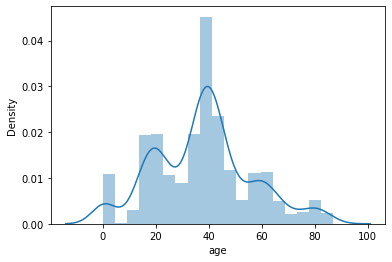

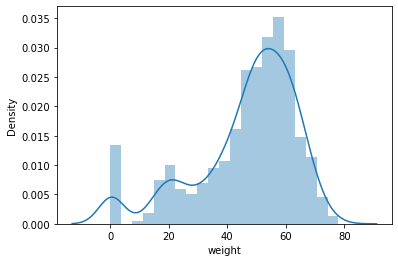

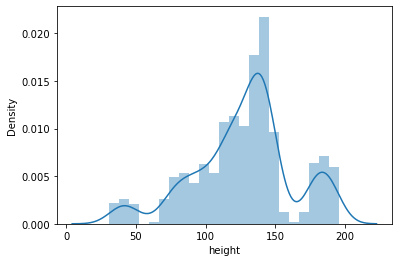

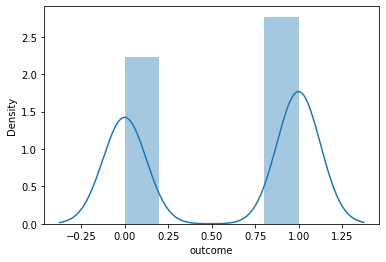

In [102]:
for i in td1.columns:
    if (i=='sex' or i =='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td1[i])

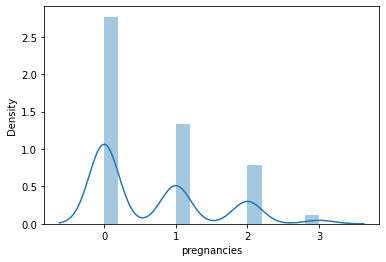

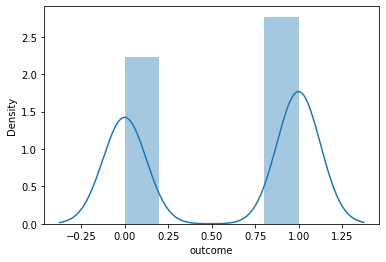

In [103]:
for i in td2.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td2[i])

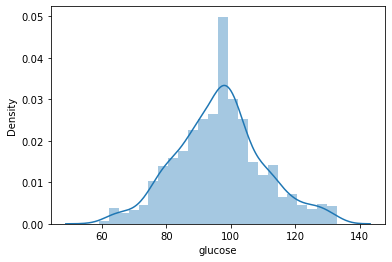

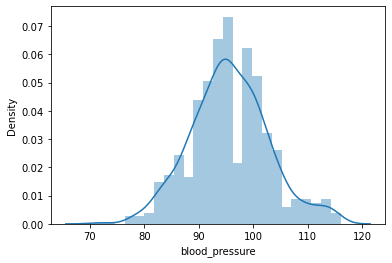

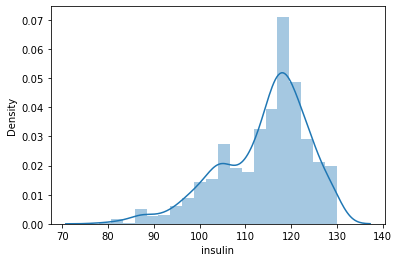

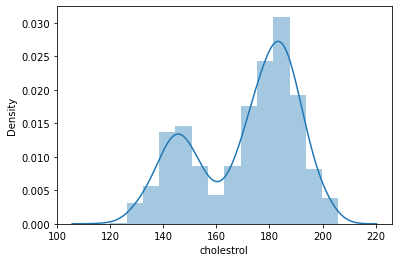

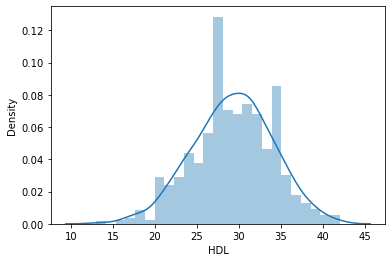

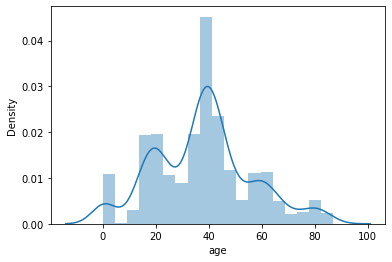

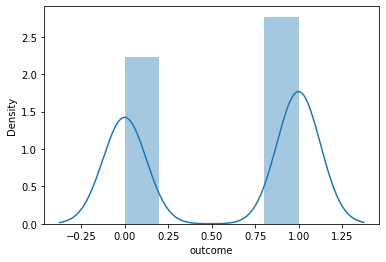

In [104]:
for i in td4.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td4[i])

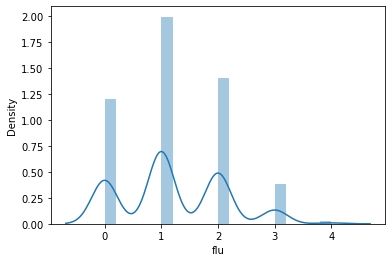

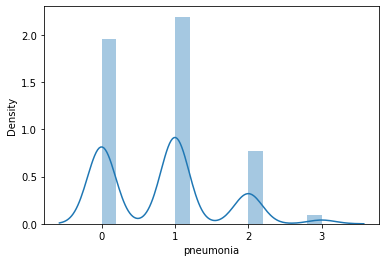

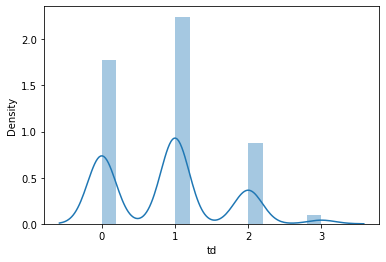

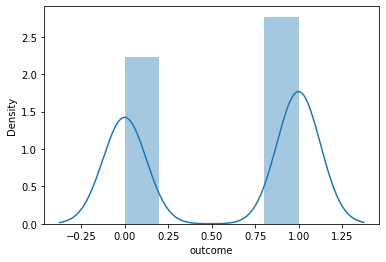

In [105]:
for i in td5.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td5[i])

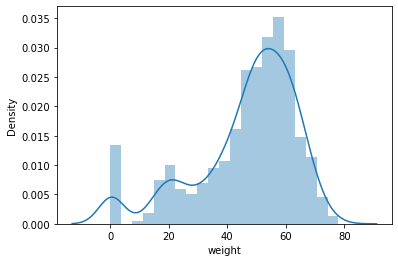

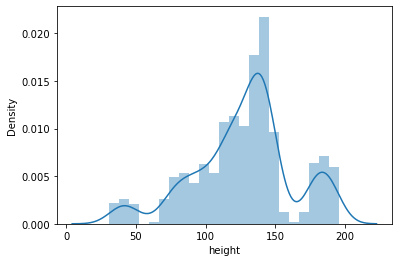

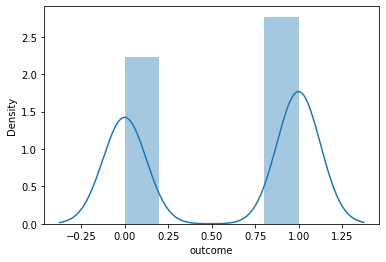

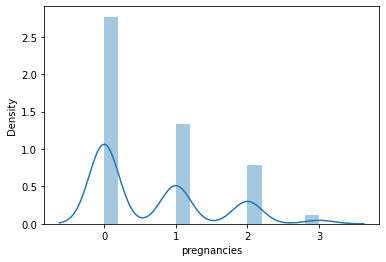

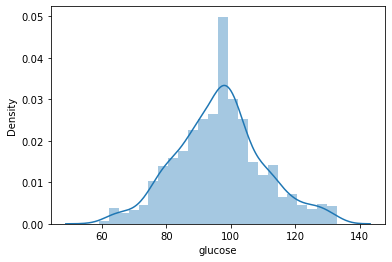

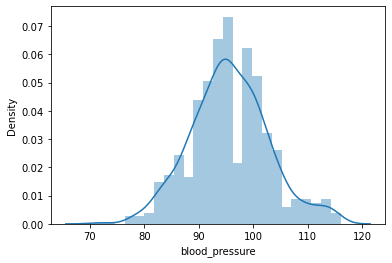

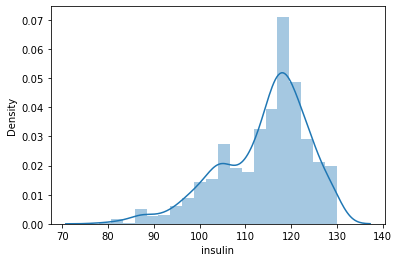

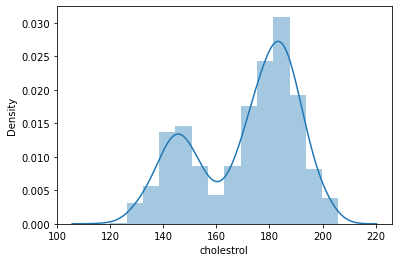

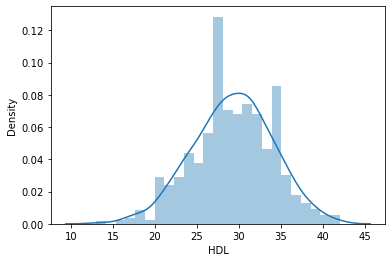

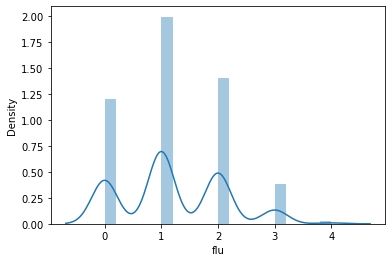

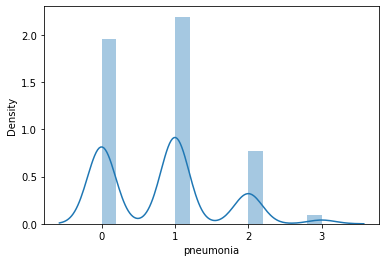

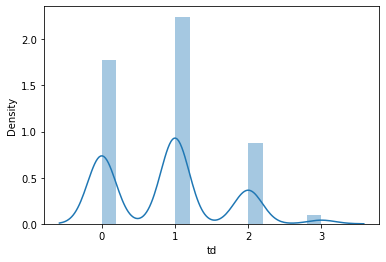

In [106]:
categorical = ['vision', 'eye_color', 'sex', 'PatientID', 'age']
for i in full_df.columns:
    if (i in categorical):
        continue
    else :
        
        plt.figure()
        sns.distplot(full_df[i])